# **Business Case**
<h3> Based on given feature of dataset we need to predict the perfomance rating of employee</h3>

# **--->Problem Statement**

 INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management.CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance

The following insights are expected from this project:

* Department wise performances
* Top 3 Important Factors effecting employee performance
* A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
* Recommendations to improve the employee performance based on insights from analysis.


**-->Requirements**
* Dataset: The data was given from the IABAC for this project where the collected source is IABAC™. The data is based on INX Future Inc, (referred as INX ). The data is not from the real organization.
* The whole project was done in google colab with Python 3 Google Compute Engine backend.

# **Data Analysis**
The given Employee dataset consist of 1200 rows and 28 columns. The 28 features are classified into quantitative and qualitative where 19 features are quantitative (11 columns consists numeric data & 8 columns consists ordinal data) and 8 features are qualitative.
The Target variable consist of ordinal data, so this is a classification problem.


**Categorical Features:**

* EmpNumber
* Gender
* EducationBackground
* MaritalStatus
* EmpDepartment
* EmpJobRole
* BusinessTravelFrequency
* OverTime
* Attrition

**Numerical Features:**

* Age
* DistanceFromHome
* EmpHourlyRate
* NumCompaniesWorked
* EmpLastSalaryHikePercent
* TotalWorkExperienceInYears
* TrainingTimesLastYear
* ExperienceYearsAtThisCompany
* ExperienceYearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

**Ordinal Features:**

* EmpEducationLevel
* EmpEnvironmentSatisfaction
* EmpJobInvolvement
* EmpJobLevel
* EmpJobSatisfaction
* EmpRelationshipSatisfaction
* EmpWorkLifeBalance
* PerformanceRating











# Data preprocessing Summary

* Basic checks
* Checkin for missing values
* Outlier Handling
* Converting Categorical values to numerical values
* Feature engineering and scaling
* Top 3 Important Factors effecting employee performance
* Saving the preprocessed data

# **Importing basic libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data=pd.read_excel('/content/gdrive/My Drive/capstone project/project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

**Basic Checks**

In [ ]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [ ]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
data.shape

(1200, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

--> Checking the unique values in int64 data type to understand ordinal and numerical datatypes

In [ ]:
for i in data.select_dtypes(include=["int64"]):
  print(i,data[i].unique())


Age [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
DistanceFromHome [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
EmpEducationLevel [3 4 2 5 1]
EmpEnvironmentSatisfaction [4 2 1 3]
EmpHourlyRate [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
EmpJobInvolvement [3 2 1 4]
EmpJobLevel [2 3 5 1 4]
EmpJobSatisfaction [4 1 2 3]
NumCompaniesWorked [1 2 5 3 8 7 9 4 6 0]
EmpLastSalaryHikePercent [12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
EmpRelationshipSatisfaction [4 3 2 1]
TotalWorkExperienceInYears [10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
Train

From above output:
* Numerical columns:Age, DistanceFromHome, EmpHourlyRate, NumCompaniesWorked,
 EmpLastSalaryHikePercent, TotalWorkExperienceInYears, TrainingTimesLastYear,ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
* Ordinal Features:
EmpEducationLevel, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel,
 EmpJobSatisfaction, EmpRelationshipSatisfaction, EmpWorkLifeBalance,
 PerformanceRating

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [ ]:
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


Looking for unique values in categorical column

In [ ]:
for i in data. select_dtypes(include=["O"]):
  print(i)
  print(data[i].unique())


EmpNumber
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime
['No' 'Yes']
Attrition
['No' 'Yes']


# **Data Preprocessing**

* Handling Missing values
* Handling outliers
* Converting Categorical values to numerical values
* Feature engineering

<h3>Checking if there is any missing values</h3>

In [ ]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [ ]:
#checking for duplicates
data.duplicated().sum()

0

<H3> Handling outlier</h3>


*   IQR Method is using for outlier handling.
* Imputing with median if the oulier percentage is less than or equal to 5% otherwise keeping the original data because it may leads data loss</head>

In [ ]:
num_data=data[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
              'TrainingTimesLastYear','ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

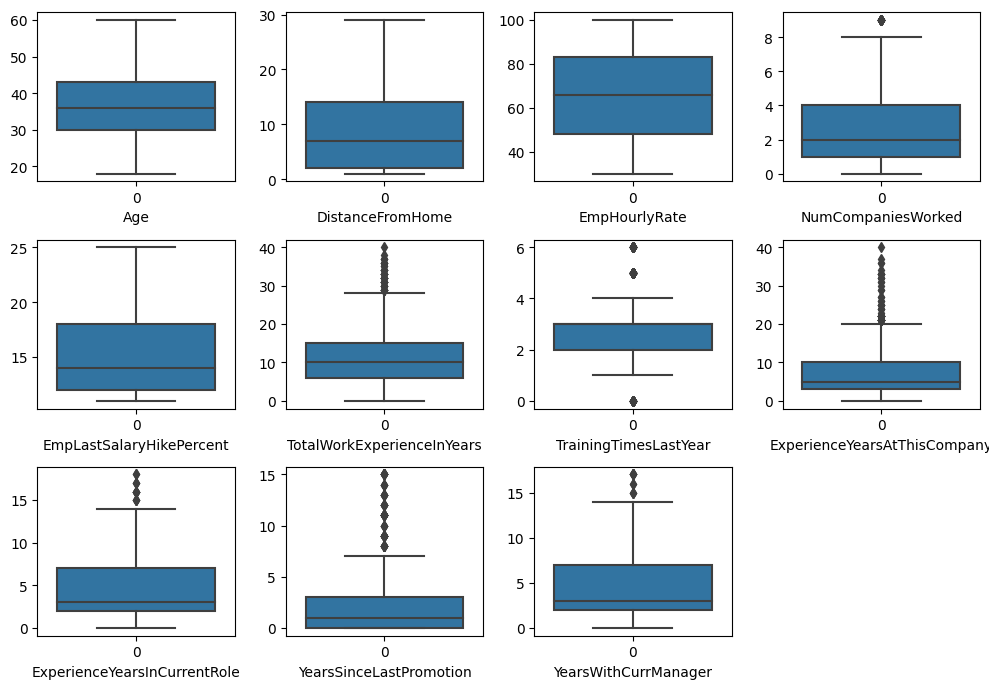

In [ ]:
plt.figure(figsize=(10,7))
plotnumber=1
for column in num_data:
    if plotnumber<=12 :
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

'NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear',ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion', 'YearsWithCurrManager' ,
* These colums have outliers
* handling outlier only if it is less or equal to 5 percentage

In [ ]:
from scipy import stats

In [ ]:
for i in num_data:
         IQR = stats.iqr(num_data[i], interpolation = 'midpoint') # calculating IQR and minimum and maximum limit for i
         Q1 = num_data[i].quantile(0.25)
         Q3 =num_data[i].quantile(0.75)
         min_limit=Q1 - 1.5*IQR
         max_limit=Q3 +1.5*IQR
         print(i)
         print('lwlmt',min_limit)
         print('uplmt',max_limit)
         print('percentage of uplmt',len(num_data.loc[num_data[i] > max_limit])/len(data)*100) # Calculating outlier percentage in each side
         print('percentage of lwlmt',len(num_data.loc[num_data[i] < min_limit])/len(data)*100)
         s= len(num_data.loc[num_data[i] > max_limit])/len(data)*100 + len(num_data.loc[num_data[i] < min_limit])/len(data)*100 #total outlier percentage
         print("percentage of outlier is",s)
         if s<=5.0:
          print("median is {}".format( data[i].median()))#if the outlier percentage is less or equal to five then imputing them with median
          data.loc[data[i]<min_limit,i]=data[i].median()
          data.loc[data[i]>max_limit,i]=data[i].median()
         print("**********************")

Age
lwlmt 10.5
uplmt 62.5
percentage of uplmt 0.0
percentage of lwlmt 0.0
percentage of outlier is 0.0
median is 36.0
**********************
DistanceFromHome
lwlmt -16.0
uplmt 32.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
percentage of outlier is 0.0
median is 7.0
**********************
EmpHourlyRate
lwlmt -4.5
uplmt 135.5
percentage of uplmt 0.0
percentage of lwlmt 0.0
percentage of outlier is 0.0
median is 66.0
**********************
NumCompaniesWorked
lwlmt -3.5
uplmt 8.5
percentage of uplmt 3.25
percentage of lwlmt 0.0
percentage of outlier is 3.25
median is 2.0
**********************
EmpLastSalaryHikePercent
lwlmt 3.0
uplmt 27.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
percentage of outlier is 0.0
median is 14.0
**********************
TotalWorkExperienceInYears
lwlmt -7.5
uplmt 28.5
percentage of uplmt 4.25
percentage of lwlmt 0.0
percentage of outlier is 4.25
median is 10.0
**********************
TrainingTimesLastYear
lwlmt 0.5
uplmt 4.5
percentage of uplmt 12.0
per

* Outliers are not handled in below columns because the outlier percentage is greaterthan 5 percentage.
 TrainingTimesLastYear,YearsSinceLastPromotion

<h3> Converting categorical values </h3>

In [ ]:
for i in data.select_dtypes(include='O'):
  print(i,data[i].unique())
  print(data[i].value_counts())
  print('******************************')

EmpNumber ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
E1001000    1
E100346     1
E100342     1
E100341     1
E100340     1
           ..
E1001718    1
E1001717    1
E1001716    1
E1001713    1
E100998     1
Name: EmpNumber, Length: 1200, dtype: int64
******************************
Gender ['Male' 'Female']
Male      725
Female    475
Name: Gender, dtype: int64
******************************
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64
******************************
MaritalStatus ['Single' 'Married' 'Divorced']
Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64
******************************
EmpDepartment ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Fina

Doing Frequency encoding for replacing.

In [ ]:
fre_en={'Gender':{'Male':1, 'Female':0},
        'MaritalStatus':{'Divorced':0,'Single':1,'Married':2},
        'EducationBackground':{'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0},
        'EmpDepartment':{'Sales':5,'Development':4,'Research & Development':3,'Human Resources':2,'Finance':1,'Data Science':0},
        'EmpJobRole':{'Sales Executive':18,'Developer':17,'Manager R&D':16,'Research Scientist':15,'Sales Representative':14,'Laboratory Technician':13,'Senior Developer':12,'Manager':11,
                      'Finance Manager':10,'Human Resources':9,'Technical Lead':8,'Manufacturing Director':7,'Healthcare Representative':6,
                      'Data Scientist':5,'Research Director':4,'Business Analyst':3,'Senior Manager R&D':2,'Delivery Manager':1,'Technical Architect':0},
        'BusinessTravelFrequency':{'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0},
        'OverTime':{'No':1, 'Yes':0},
        'Attrition':{'No':1, 'Yes':0}

}
data=data.replace(fre_en)

 <h3> Feature engineering and scaling </h3>

Droping feature EmpNumber because it is unique feature

In [ ]:
data.drop(['EmpNumber'],axis=1,inplace=True)

In [ ]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,1,5,18,2,10,3,4,...,4,10,2,2,10,7,0,8,1,3
1,47,1,3,1,5,18,2,14,4,4,...,4,20,2,3,7,7,1,7,1,3
2,40,1,5,2,5,18,1,5,4,4,...,3,20,2,3,18,13,1,12,1,4
3,41,1,0,0,2,11,2,10,4,2,...,2,23,2,2,5,6,12,6,1,3
4,60,1,3,1,5,18,2,16,4,1,...,4,10,1,3,2,2,2,2,1,3


<h3>Checking Corelation</h3>



<Axes: >

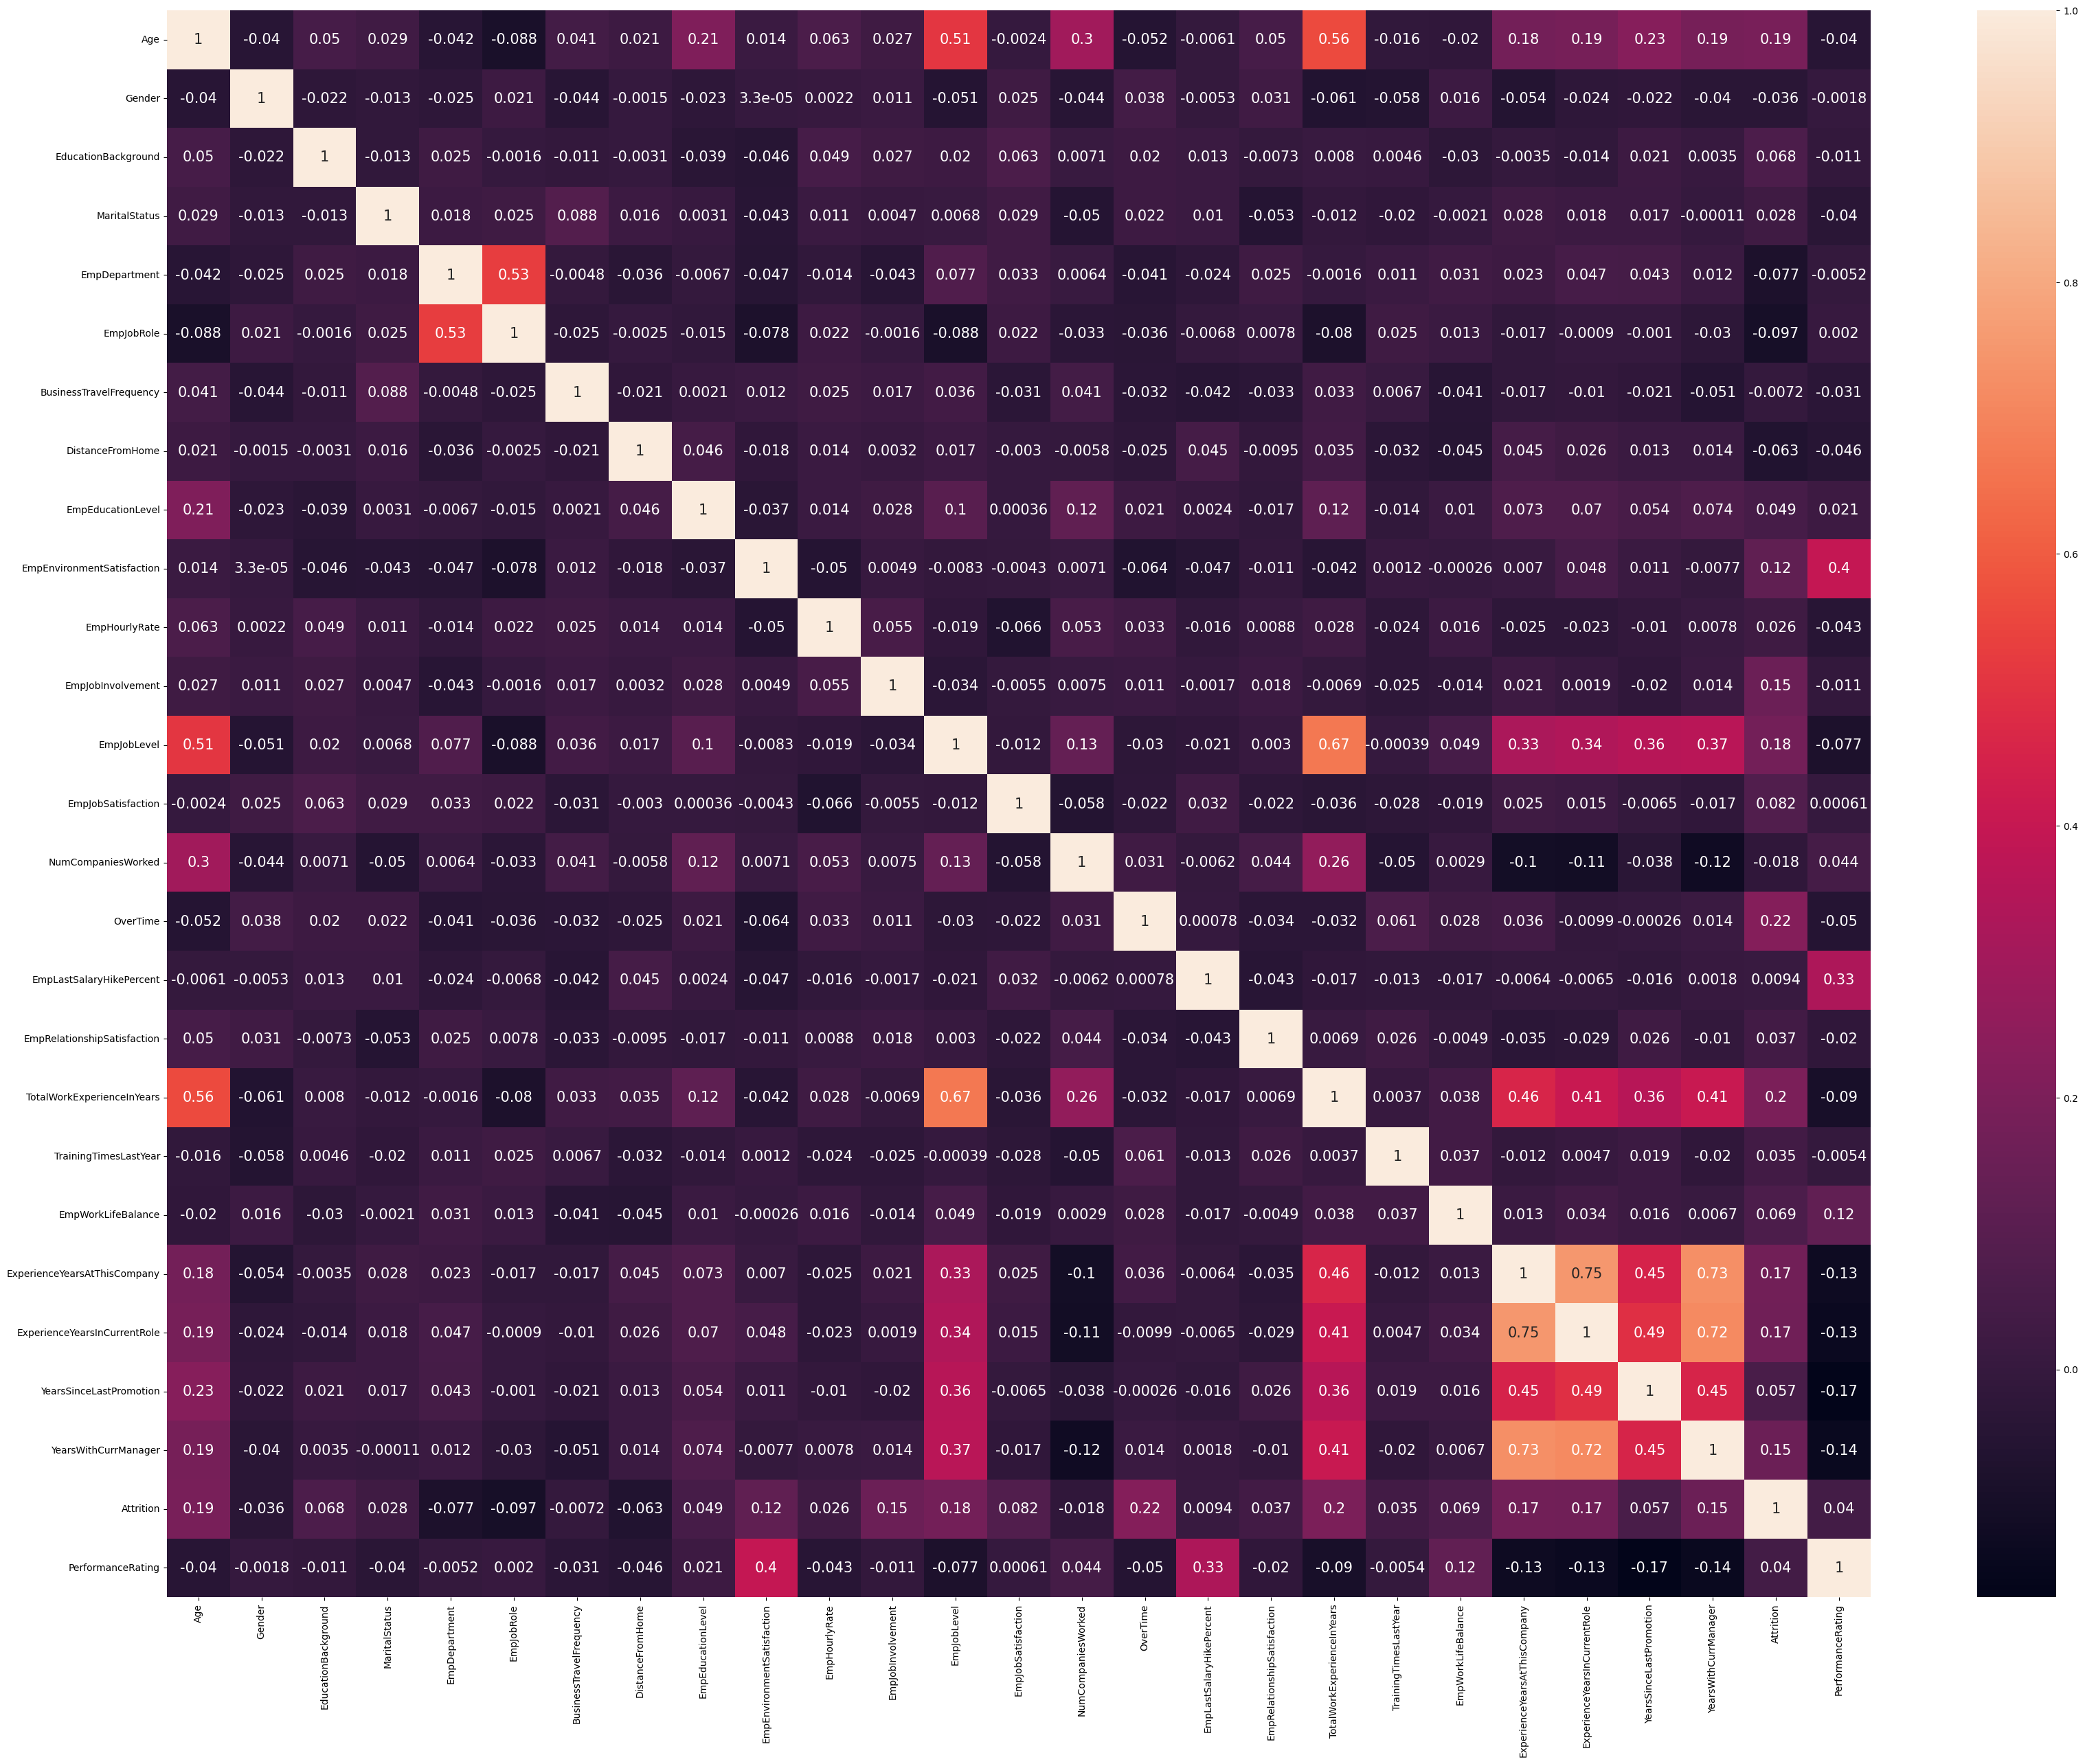

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(),annot=True, annot_kws={"size":15})

Above graph we can see that independ variable are not highly corelated


<h2><b>Top 3 Important Factors effecting employee performance</b></h2>

In [ ]:
corr1=data.corr().PerformanceRating.sort_values(ascending=False)
corr1.head(4)

PerformanceRating             1.000000
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
EmpWorkLifeBalance            0.124429
Name: PerformanceRating, dtype: float64

 These are the most affecting factors on employee performance
* EmpEnvironmentSatisfaction,
* EmpLastSalaryHikePercent,
* EmpWorkLifeBalance



In [ ]:
num_data.columns

Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
stanscale=StandardScaler()
data[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked','EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears','TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]=stanscale.fit_transform(data[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked','EmpLastSalaryHikePercent',
        'TotalWorkExperienceInYears','TrainingTimesLastYear', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']])

In [ ]:
data.to_csv('Employee_performance_preprocessed_data.csv')

In [ ]:
df=pd.read_csv('Employee_performance_preprocessed_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,-0.541458,1,3,1,5,18,2,0.102061,3,...,4,-0.058535,-0.622235,2,0.868276,0.864098,-0.681372,1.202103,1,3
1,1,1.109888,1,3,1,5,18,2,0.591464,4,...,4,1.512870,-0.622235,3,0.200371,0.864098,-0.370834,0.902825,1,3
2,2,0.339260,1,5,2,5,18,1,-0.509693,4,...,3,1.512870,-0.622235,3,2.649355,2.661702,-0.370834,2.399219,1,4
3,3,0.449349,1,0,0,2,11,2,0.102061,4,...,2,1.984292,-0.622235,2,-0.244898,0.564498,3.045084,0.603546,1,3
4,4,2.541054,1,3,1,5,18,2,0.836165,4,...,4,-0.058535,-1.414051,3,-0.912803,-0.633905,-0.060296,-0.593570,1,3
